# Mid-Term Test #1 (Monday, 08:15 - 09:45) - Chapter 2

Below you find the exercises for the mid-term test #1 about Chapter 2. Passing two of these mid-term tests will grant you permission to the exam. You will have 90 minutes of time to solve these exercises. The purpose of the prepared code snippets below is to give you some helpful structure for coding by predefining some useful variable names, but you do not need to use these prepared code snippets and prepared variable names if you do not want to. Do not hestitate to use the function `help()` to print the documentation of the functions that you need. If you are stuck, please ask one of the supervisors present.

## The Setting

Suppose that you have observations of a stock $S_n$, $n \in \{0, \dots, N\}$ with $N = 10\,000$, whose logarithmic returns $X_{n + 1} = \log(S_{n + 1}) - \log(S_{n})$ are distributed as $\frac{1}{25}$ times a $t$-distribution with 4 degrees of freedom. You would like to model negative (percentage) returns as a loss, i.e. $L_{n + 1} = -\big(\frac{S_{n + 1}}{S_n} - 1\big) = 1 - \exp(X_{n+1})$, and your goal is to obtain estimates of the Value-at-Risk for this loss over time.

The goal of this mid-term test is to simulate a synthetic data set with the above distribution and obtain Value-at-Risk (VaR) estimates $\widehat{\mathrm{VaR}_{0.95}}(L_{n+1})$, $n \in \{1, \dots, N - 1\}$ for the losses using the method of historical simulation as outlined in Section 2.3. Additionally, the goal is to obtain confidence intervals for the VaR estimates using the method in Section 2.3.2.

<br>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, binom

<br><br>

## Step 1: Generate and Visualise the Data Set

**Task 1.1**: Use the function `t.rvs()` to generate $N = 10\,000$ $t$-distributed datapoints with 4 degrees of freedom (use the argument `df` of the `t.rvs()` function to specify the degrees of freedom). Use the `numpy` seed 10 for reproducibility. Afterwards define an array `X` that contains the log-returns $X_{n}$, $n \in \{1, \dots, N\}$ as described in the setting above.

In [5]:
np.random.seed(10)

In [15]:
# Set parameters
sample_size = 10000
deg_free = 4

In [39]:
X = (1/25) * t.rvs(df=deg_free, size=sample_size)
X

array([ 0.0079913 , -0.08404012,  0.01214248, ...,  0.03954838,
       -0.04392868, -0.00086247])

**Task 1.2**: Visualise your generated log-returns `X` by using the function `plt.plot`.

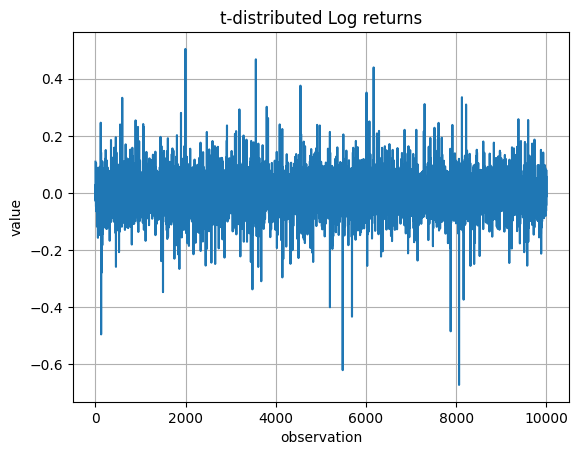

In [20]:
plt.plot(X)
plt.title("t-distributed Log returns")
plt.xlabel("observation")
plt.ylabel("value")

plt.grid()
plt.show()

**Task 1.3** Suppose that the stock $S$ has an initial price $S_0 = 100$. Use the simulated logarithmic returns $(X_n)_{n \in \{1, \dots, N\}}$ stored in the array `X` to compute the stock prices $S_1, \dots, S_M$ over the first five years (assuming 252 days per year), i.e. using $M = 5 \cdot 252 = 1260$. Plot the stock prices using the function `plt.plot`.

*Useful Python commands*: `np.cumprod`, `np.cumsum`

In [46]:
# Set parameters
td = 252
years = 5
M = td * years

S_0 = 100

In [69]:
# Compute (simulated) stock price --> error !!!
S = S_0 * np.cumsum(X)

In [67]:
# Get help array to plot and filter data
help_array = np.arange(0, M)
help_array

array([   0,    1,    2, ..., 1257, 1258, 1259])

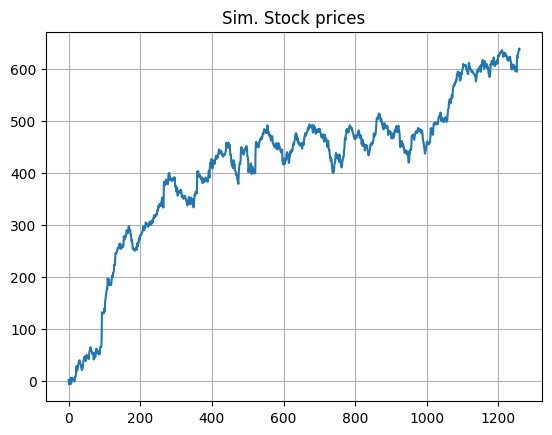

In [70]:
plt.plot(help_array, S[:M])
plt.title("Sim. Stock prices")

plt.grid()
plt.show()

<br><br>

## Step 2: Compute the Value-at-Risk Estimates

We are now ready to compute the VaR estimates at level $\alpha = 0.95$ for the negative daily (percentage) returns $L_{n + 1} = -\big(\frac{S_{n + 1}}{S_n} - 1\big) = 1 - \exp(X_{n+1})$ as losses.

**Task 2.1**: Define an array `L` of length $N = 10\,000$ that contains the losses $(L_{n})_{n \in \{1, \dots, N\}}$.

*Useful Python commands*: `np.exp`

In [71]:
# Get 5 years timeseries
S_5 = S[:M]
len(S_5)

1260

In [72]:
# Compute Losses
L = -np.diff(S_5-1)
len(L)

1259

**Task 2.2**: For each $n \in \{1, \dots, N - 1\}$, compute the 0.95-VaR estimate $\widehat{\mathrm{VaR}_{0.95}}(L_{n+1})$ using the method of historical simulation outlined in Section 2.3.3. That is, for each $n \in \{1, \dots, N - 1\}$, use the past history of losses $L_{i + 1}$, $i \in \{0, \dots, n - 1\}$, in order to obtain the empirical 0.95-quantile of the law of $L_{n + 1}$. Store your VaR estimates in an array `VaR`.

*Useful Python commands*: `np.sort`, `np.quantile`

In [73]:
# Set parameters
alpha = 0.95
VaR = np.zeros(len(S_5))

In [74]:
np.quantile(5, alpha)

np.float64(5.0)

In [75]:
# Dynamic look-back window
for i in range(len(VaR)):
    # Set up window
    L_window = np.zeros(i)

    # Catch exeption that L == 0 (else we get error) 
    if i == 0: 
        L_window = L[i]
    else:
        L_window = L[:i]
    #Calculate VaR
    VaR[i] = np.quantile(a=L_window, q=alpha)

VaR

array([8.40401206, 8.40401206, 7.92309906, ..., 8.00333841, 7.99743364,
       7.99152887])

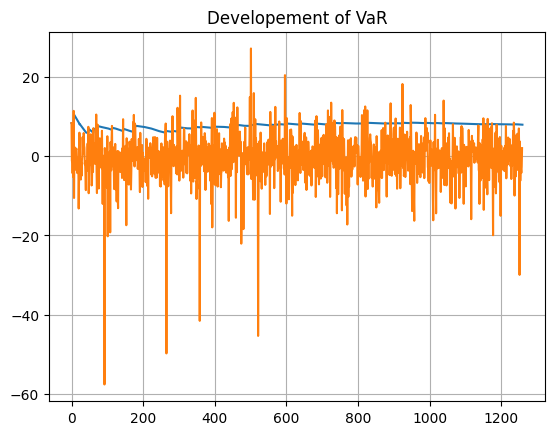

In [76]:
plt.plot(VaR)
plt.plot(L)
plt.title("Developement of VaR")

plt.grid()
plt.show()

<br><br>

## Step 3: Compute Confidence Intervals for the Value-at-Risk

We would now like to obtain a confidence interval at level $p = 0.99$ for each of the Value-at-Risk estimates stored in the array `VaR` using the approach from Section 2.3.2. 

**Task 3.1**: For each $n \in \{1, \dots, N - 1\}$, compute the integer $i$ from equation (2.6) in the lecture notes. That is, for each $n \in \{1, \dots, N - 1\}$, the corresponding integer $i$ is given by $1$ plus the $\frac{1 + p}{2} = 0.995$-quantile of the binomial distribution with parameters $n$ and $1 - \alpha = 0.05$. Store the $N - 1$ different integers $i$ in an array `i_arr`.

*Useful Python commands*: The $q$-quantile of the binomial distribution with parameters $m$ and $p$ can be computed by the `scipy` command `binom(m, p).ppf(q)`. In order to speed up computations, the argument `m` of the preceding command can also be an array.

In [77]:
# Set parameters - $$Reference: [2.6]
alpha = 0.95
p0 = 0.99

# Dynamic i and j
i_arr = np.zeros(len(S_5))
j_arr = np.zeros(len(S_5))

In [78]:
# Get i
for i in range(len(S_5)):
    i_arr[i] = 1 + binom(i, 1-alpha).ppf((1+p0)/2)
i_arr

array([ 1.,  2.,  2., ..., 85., 85., 85.])

**Task 3.2**: For each $n \in \{1, \dots, N - 1\}$, compute the integer $j$ from equation (2.7) in the lecture notes. That is, for each $n \in \{1, \dots, N - 1\}$, the corresponding integer $j$ is given by the $\frac{1 - p}{2} = 0.005$-quantile of the binomial distribution with parameters $n$ and $1 - \alpha = 0.05$. Store the $N - 1$ different integers $j$ in an array `j_arr`.

In [79]:
# Get j
for j in range(len(S_5)):
    j_arr[j] = binom(j, 1-alpha).ppf((1-p0)/2)

j_arr

array([ 0.,  0.,  0., ..., 44., 44., 44.])

**Task 3.3**: For each $n \in \{1, \dots, N-1\}$, compute the lower confidence boundary $X_{i:n}$ as well as the upper confidence boundary $X_{j:n}$ (see Section 2.3.2) using the corresponding integers $i$ and $j$ stored in the arrays `i_arr` and `j_arr`. Store the lower and upper confidence boundaries in arrays `VaR_lower` and `VaR_upper`.

*Useful Python commands*: `np.sort`

In [59]:
VaR_lower = np.zeros(len(VaR))
VaR_lower = np.zeros(len(VaR))

In [60]:
for i in range(len(S_5)):
    # Set up window
    L_window = np.zeros(i)

    # Catch exeption that L == 0 (else we get error) 
    if i == 0: 
        L_window = L[i]
    else:
        L_window = L[:i]
    #Calculate VaR
    VaR[i] = np.quantile(a=L_window, q=alpha)

VaR

array([  8.47117104,   8.47117104,   7.99155797, ..., 256.80332123,
       256.73845149, 256.67358175])

In [61]:
for i in range(len(VaR)):
    # Set up window
    L_window = np.zeros(i)

    # Catch exeption that L == 0 (else we get error) 
    if i == 0: 
        L_window = L[i]
        sorted_window = L_window
    else:
        L_window = L[:i]
        # Sort data (descending order)
        sorted_window = np.sort(L_window)[::-1]

    # Get bounds
    VaR_upper[i] = sorted_window[i_arr]
    VaR_lower[i] = sorted_window[i_arr]

# error with the sort function --> AxisError: axis -1 is out of bounds for array of dimension 0

IndexError: invalid index to scalar variable.

<br><br>

## Step 4: Plot the VaR Estimates and Interpret the Results

**Task 4.1**: Compute the theoretical 0.95 quantile $\mathrm{VaR}_{0.95}(L_{n+1})$ of the law of the loss $L_{n + 1} = 1 - \exp(X_{n+1})$. A simple calculation shows that this is given by $\mathrm{VaR}_{0.95}(L_{n+1}) = 1 - \exp(\frac{1}{25} t_{0.05})$, where $t_{0.05}$ denotes the 0.05-quantile of the $t$ distribution with 4 degrees of freedom. Store this theoretical quantile in a variable named `q`.

*Useful Python commands*: The `alpha`-quantile of the $t$ distribution with `nu` degrees of freedom can be accessed by the `scipy` command `t(df=nu).ppf(alpha)`.

In [62]:
q = ...

**Task 4.2** Plot the Value-at-Risk estimates stored in the array `VaR` as well as the lower and upper confidence bounds stored in the arrays `VaR_lower` and `VaR_upper` in a common plot. Add a horizontal line to the plot at the height of the theoretical quantile $\mathrm{VaR}_{0.95}(L_{n+1})$ that you computed in Task 4.1. Interpret your results using a comment, especially with regards to Theorem 2.3.

*Useful Python commands*: `plt.axhline`

In [ ]:
...
plt.show()